# EQUITY DIGITAL OPTION CASH-OR-NOTHING OPTION

Valuation and Risk of Equity Digital Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  23 Sep 2020 at 00:02 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Cash-or-Nothing Digital Option

I define a digital call and a digital put option.

In [3]:
underlyingType = FinDigitalOptionTypes.CASH_OR_NOTHING

In [4]:
expiryDate = FinDate(1, 10, 2008)

In [5]:
strikePrice = 90.0

In [6]:
digitalCall = FinEquityDigitalOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL, underlyingType)

In [7]:
digitalPut = FinEquityDigitalOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT, underlyingType)

In [8]:
print(digitalCall)

OBJECT TYPE: FinEquityDigitalOption
EXPIRY DATE: WED 01 OCT 2008
BARRIER LEVEL: 90.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
UNDERLYING TYPE: FinDigitalOptionTypes.CASH_OR_NOTHING


In [9]:
print(digitalPut)

OBJECT TYPE: FinEquityDigitalOption
EXPIRY DATE: WED 01 OCT 2008
BARRIER LEVEL: 90.0
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT
UNDERLYING TYPE: FinDigitalOptionTypes.CASH_OR_NOTHING


## Valuation

In [10]:
valueDate = FinDate(1, 1, 2008)

In [11]:
interestRate = 0.045

In [12]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [13]:
volatility = 0.25

In [14]:
model = FinEquityModelBlackScholes(volatility)

In [15]:
stockPrice = 110.0
dividendYield = 0.045

In [16]:
digitalCall.value(valueDate, stockPrice, discountCurve, dividendYield, model)

0.7669597420265628

In [17]:
digitalPut.value(valueDate, stockPrice, discountCurve, dividendYield, model)

0.19991287275825548

## Check Monte-Carlo

In [18]:
digitalCall.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model)

0.7695822577379761

In [19]:
digitalPut.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model)

0.1972903570468422

## Vectorisations

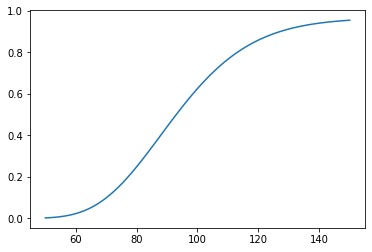

In [20]:
stockPrices = np.linspace(50,150,100)
v = digitalCall.value(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, v);

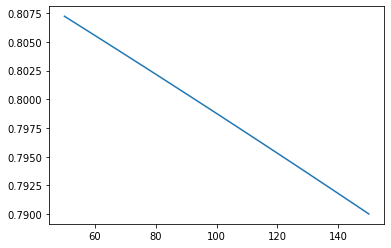

In [21]:
dividendYields = np.linspace(0,0.02,100)
v = digitalCall.value(valueDate, stockPrice, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

We can vectorise two things at the same time as long as they have the same length

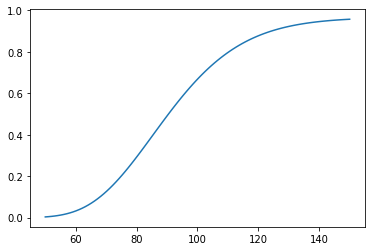

In [22]:
stockPrices = np.linspace(50,150,100)
dividendYields = np.linspace(0, 0.02 , 100)
v = digitalCall.value(valueDate, stockPrices, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

And we can do the same to the option delta.

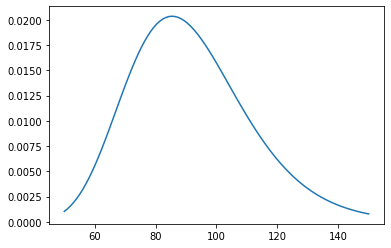

In [23]:
stockPrices = np.linspace(50,150,100)
dividendYields = np.linspace(0, 0.02 , 100)
v = digitalCall.delta(valueDate, stockPrices, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

## Risk Analysis

The analytical model produced the following sensitivities

In [24]:
digitalCall.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

0.011588377135662853

In [25]:
digitalCall.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

-0.0005030864613786434

In [26]:
digitalCall.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

0.22515623620513792

In [27]:
digitalCall.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

-1.1421272833700424

In [28]:
digitalCall.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

0.3799449199659577

Copyright (c) 2020 Dominic O'Kane